In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Create known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start , end , step).unsqueeze(dim = 1)
y = weight * X + bias

##Splitting data into train , validation and test

In [3]:
X_train , y_train = X[:40] , y[:40]
X_test , y_test = X[40:] , y[40:]

In [4]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None) :
    plt.figure(figsize = (10,7))
    plt.scatter(train_data , train_label , c = 'b' , s= 4 , label = "Training data")
    plt.scatter(test_data , test_labels , c = 'r' , s = 4 , label = "Testing data" )
    if predictions is not None :
      plt.scatter(test_data , predictions , c = "g" , s = 4 , label = "Predictions")
    plt.legend(prop={"size" : 14})


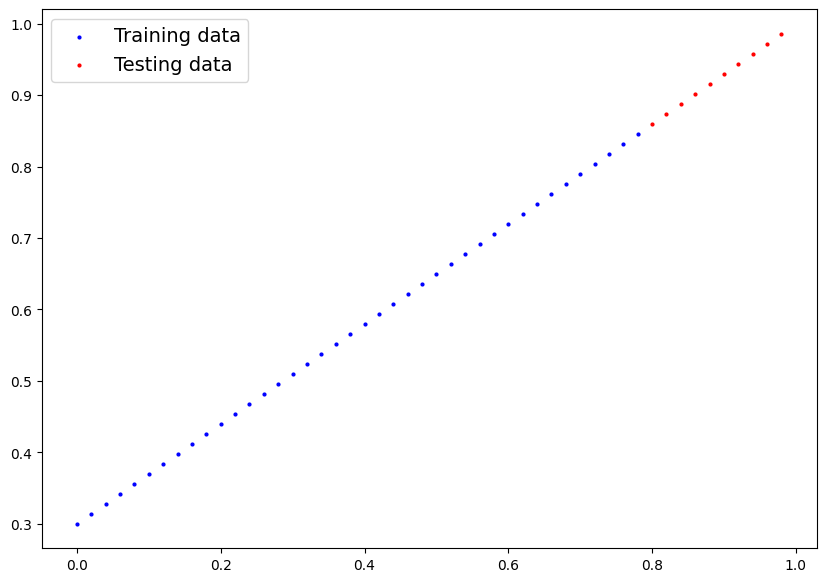

In [5]:
plot_predictions()

##First Pytorch model

* torch.nn	- Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).

* torch.nn.Parameter	- Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".

* torch.nn.Module	- The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.

* torch.optim	Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).

* def forward()	- All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).

In [6]:
class LinearRegression(nn.Module): # <- almost everything in Pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad = True))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True))

  def forward(self , x: torch.Tensor) -> torch.Tensor : # Takes tensor as an input and returns some other tensor as an ouput
    return self.weights*x + self.bias

In [7]:
torch.manual_seed(42)

# Create an instance of the model (this is a sub class of nn.Module)

model_0 = LinearRegression()

print(model_0.parameters())
print(list(model_0.parameters()))

<generator object Module.parameters at 0x7fb74db65d20>
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

##Making predictions using torch.inference_mode()

* To check our model's predictive power , let's see how well it predicts y_test based on x_test

* When we pass data through our model , it's going to run it through forward() method

In [9]:
# Context Managers
# inference_mode turns off displaying gradients content
with torch.inference_mode() :
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [10]:
#The above one is simiar to
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [11]:
# Also similar as
with torch.no_grad() :
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

##Train Model

Loss function is a function measure of how wrong your model predictions are to the ideal outputs

Optimizer : Takes into account the loss of a model and adjusts the models parameters


In [12]:
# Loss Function
loss_fn = nn.L1Loss() # <- MAE

# Optimizer
optimizer = torch.optim.SGD(model_0.parameters() , lr = 0.01 , momentum = 0.9 )



In [13]:
torch.manual_seed(42)
# An epoch is one loop through the data
epochs = 30
#Training
for epoch in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)
  loss = loss_fn(y_pred , y_train)
  print(loss)

  optimizer.zero_grad()
  # Perform backpropagation of loss with respect to parameters of the model
  loss.backward()
  optimizer.step()
  model_0.eval() # turns off different settings not required for testing/evaluation (Ex:- dropout , batch_normalization)


tensor(0.3129, grad_fn=<MeanBackward0>)
tensor(0.3014, grad_fn=<MeanBackward0>)
tensor(0.2795, grad_fn=<MeanBackward0>)
tensor(0.2482, grad_fn=<MeanBackward0>)
tensor(0.2086, grad_fn=<MeanBackward0>)
tensor(0.1614, grad_fn=<MeanBackward0>)
tensor(0.1079, grad_fn=<MeanBackward0>)
tensor(0.0654, grad_fn=<MeanBackward0>)
tensor(0.0509, grad_fn=<MeanBackward0>)
tensor(0.0679, grad_fn=<MeanBackward0>)
tensor(0.1031, grad_fn=<MeanBackward0>)
tensor(0.1274, grad_fn=<MeanBackward0>)
tensor(0.1377, grad_fn=<MeanBackward0>)
tensor(0.1355, grad_fn=<MeanBackward0>)
tensor(0.1220, grad_fn=<MeanBackward0>)
tensor(0.0983, grad_fn=<MeanBackward0>)
tensor(0.0675, grad_fn=<MeanBackward0>)
tensor(0.0483, grad_fn=<MeanBackward0>)
tensor(0.0465, grad_fn=<MeanBackward0>)
tensor(0.0565, grad_fn=<MeanBackward0>)
tensor(0.0696, grad_fn=<MeanBackward0>)
tensor(0.0784, grad_fn=<MeanBackward0>)
tensor(0.0792, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0578, grad_fn=<MeanBackward0>)


In [14]:
model_0.state_dict() # it predicted the correct weight and bias

OrderedDict([('weights', tensor([0.5749])), ('bias', tensor([0.3952]))])

RuntimeError: ignored

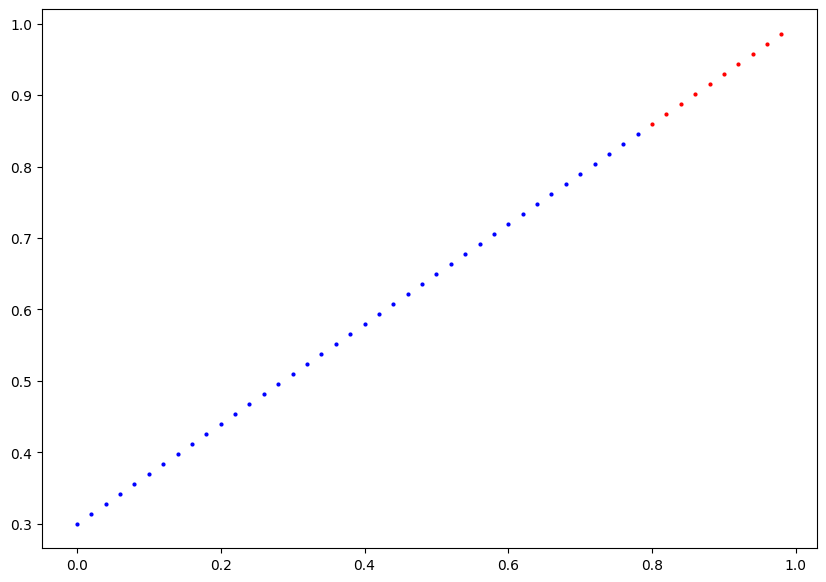

In [15]:
plot_predictions(predictions = y_pred)

In [16]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

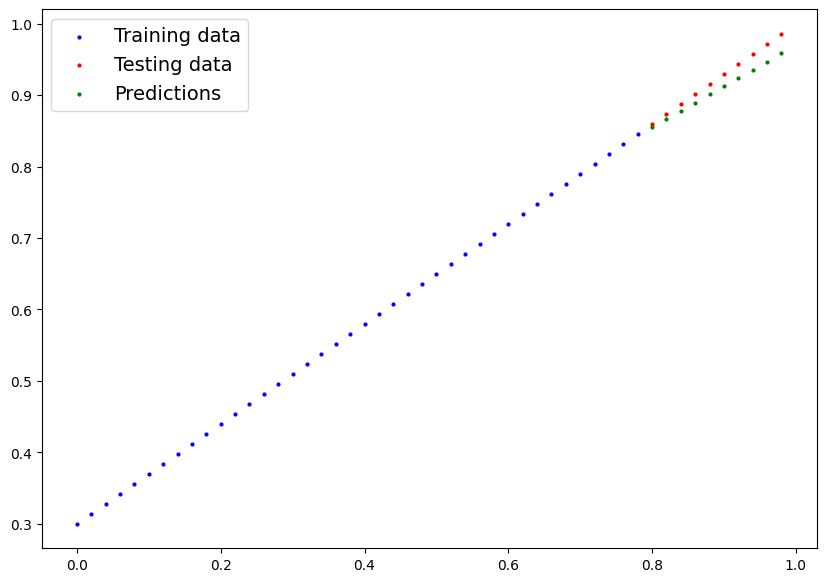

In [17]:
plot_predictions(predictions = y_pred_new)

## Save model

What if it takes too much time to train again

There are three main methods you should know about for saving model

1. torch.save() - allows you to save a pytorch object in Python's pickle format
2. torch.load() - allows you to load a saved pytorch object
3. torch.nn.Module.load_state_dict() - this allows you to saved state dictionary

docs :- https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [18]:
from pathlib import Path

#Create models directory
Model_path = Path("models")
Model_path.mkdir(parents = True , exist_ok = True)

# Create model save path
Model_name = "pytorch_workflow_model_0.pth" #pth is used to save model in pytorch
Model_save_path = Model_path / Model_name

#3 save the model state_dict
torch.save(obj = model_0.state_dict() , f = Model_save_path)

##Loading a pytorch model

Since we save our model's state_dict() rather than the entire model , we'll create a new instance of our model class and load the saved state_dict() into that

In [19]:
# We have instantiate a new instance of our model class
loaded_model_0 = LinearRegression()

# Load the saved_dict of model_0 into loaded_model_0
loaded_model_0.load_state_dict(torch.load(f=Model_save_path))

<All keys matched successfully>

In [20]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5749])), ('bias', tensor([0.3952]))])

##Create device - agnostic code
This means if we've got access to a GPU, our code will use it . If no gpu is available , the code will default to cpu

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Now we are using {device}")

Now we are using cuda


#Linear Model

In [22]:
class Linear(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1 , out_features=1)

  def forward(self,x:torch.Tensor) -> torch.Tensor :
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = Linear()
model_1 , model_1.state_dict()

(Linear(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [23]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [24]:
# Set the model to use the target device
model_1.to(device) # this line pushes the model to gpu
next(model_1.parameters()).device

device(type='cuda', index=0)

In [25]:
#Setup Loss Function
loss_fn = nn.L1Loss()

#Setup Our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters() , lr = 0.01)

In [29]:
torch.manual_seed(42)

epochs = 200

# Put data in the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #Forward pass
  y_pred = model_1(X_train)

  #loss
  loss = loss_fn(y_pred , y_train)

  optimizer.zero_grad()

  #backward
  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred , y_test)

  if epoch%10 == 0:
    print(f"epoch : {epoch} | Loss : {loss} | Test_Loss : {test_loss}")

epoch : 0 | Loss : 0.5551779866218567 | Test_Loss : 0.5739762187004089
epoch : 10 | Loss : 0.439968079328537 | Test_Loss : 0.4392664134502411
epoch : 20 | Loss : 0.3247582018375397 | Test_Loss : 0.30455657839775085
epoch : 30 | Loss : 0.20954833924770355 | Test_Loss : 0.16984669864177704
epoch : 40 | Loss : 0.09433845430612564 | Test_Loss : 0.03513690456748009
epoch : 50 | Loss : 0.023886388167738914 | Test_Loss : 0.04784907028079033
epoch : 60 | Loss : 0.019956795498728752 | Test_Loss : 0.045803118497133255
epoch : 70 | Loss : 0.016517987474799156 | Test_Loss : 0.037530567497015
epoch : 80 | Loss : 0.013089174404740334 | Test_Loss : 0.02994490973651409
epoch : 90 | Loss : 0.009653178043663502 | Test_Loss : 0.02167237363755703
epoch : 100 | Loss : 0.006215683650225401 | Test_Loss : 0.014086711220443249
epoch : 110 | Loss : 0.00278724217787385 | Test_Loss : 0.005814164876937866
epoch : 120 | Loss : 0.0012645035749301314 | Test_Loss : 0.013801801018416882
epoch : 130 | Loss : 0.001264503

In [30]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [31]:
with torch.inference_mode():
  y_preds = model_1(X_test)

TypeError: ignored

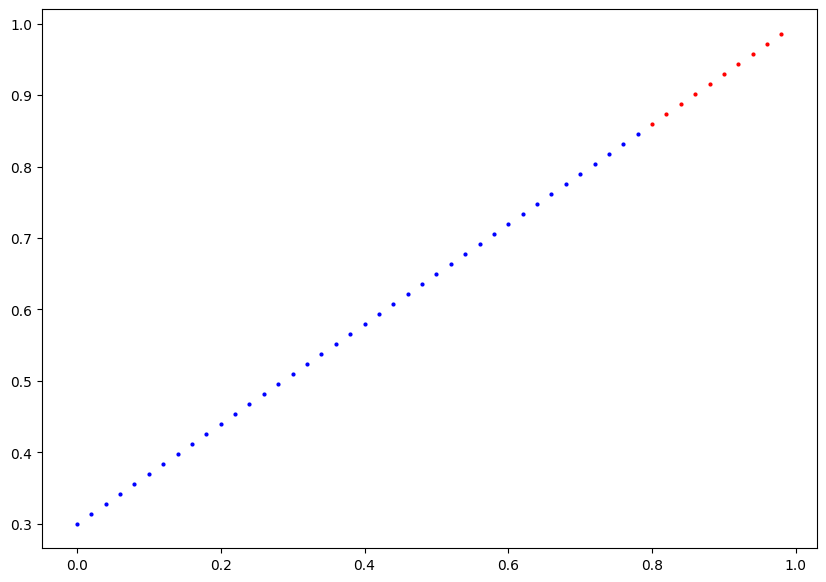

In [32]:
#Visualize
plot_predictions(predictions = y_preds)

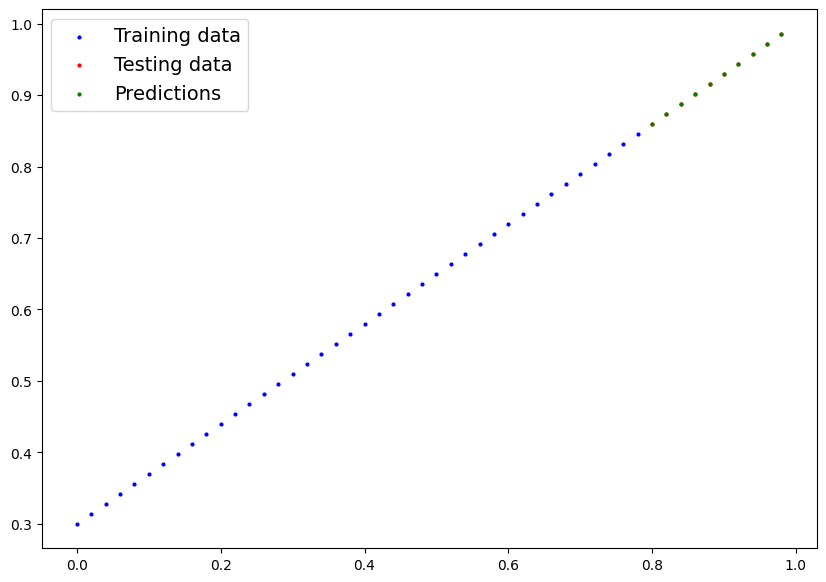

In [33]:
plot_predictions(predictions = y_preds.cpu())

In [35]:
#Saving and training model

from pathlib import Path

Model_path = Path("models")
Model_path.mkdir(parents = True , exist_ok = True)

Model_name = "Pytorch_wrokflow_model_1.pth"
Model_save_path = Model_path / Model_name

torch.save(obj = model_1.state_dict() , f = Model_save_path)



In [36]:
#Create a new instance
loaded_model_1 = Linear()

loaded_model_1.load_state_dict(torch.load(Model_save_path))

<All keys matched successfully>

In [37]:
loaded_model_1.to(device)

Linear(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)